# Data Exploration

In [1]:

# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import ShuffleSplit
%matplotlib inline
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import Ridge 
from sklearn.linear_model import Lasso
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Reading data
df=pd.read_csv('housing.csv')

In [3]:
### Getting an overview of the data

df.sample(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
95,0.12204,0.0,2.89,0,0.445,6.625,57.8,3.4952,2,276,18.0,357.98,6.65,28.4
439,9.39063,0.0,18.10,0,0.740,5.627,93.9,1.8172,24,666,20.2,396.90,22.88,12.8
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
362,3.67822,0.0,18.10,0,0.770,5.362,96.2,2.1036,24,666,20.2,380.79,10.19,20.8
93,0.02875,28.0,15.04,0,0.464,6.211,28.9,3.6659,4,270,18.2,396.33,6.21,25.0
494,0.27957,0.0,9.69,0,0.585,5.926,42.6,2.3817,6,391,19.2,396.90,13.59,24.5
76,0.10153,0.0,12.83,0,0.437,6.279,74.5,4.0522,5,398,18.7,373.66,11.97,20.0
488,0.15086,0.0,27.74,0,0.609,5.454,92.7,1.8209,4,711,20.1,395.09,18.06,15.2
125,0.16902,0.0,25.65,0,0.581,5.986,88.4,1.9929,2,188,19.1,385.02,14.81,21.4
57,0.01432,100.0,1.32,0,0.411,6.816,40.5,8.3248,5,256,15.1,392.90,3.95,31.6


In [5]:
print ('\nIn Boston dataset, number of rows  = {0} and number of columns = {1} \n\n'.format(*df.shape))
df.info()


In Boston dataset, number of rows  = 506 and number of columns = 14 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


##### From the data info, we can see that there are no null values in the dataset. The datatype shows that all the columns have numeric (float or integer datatype)


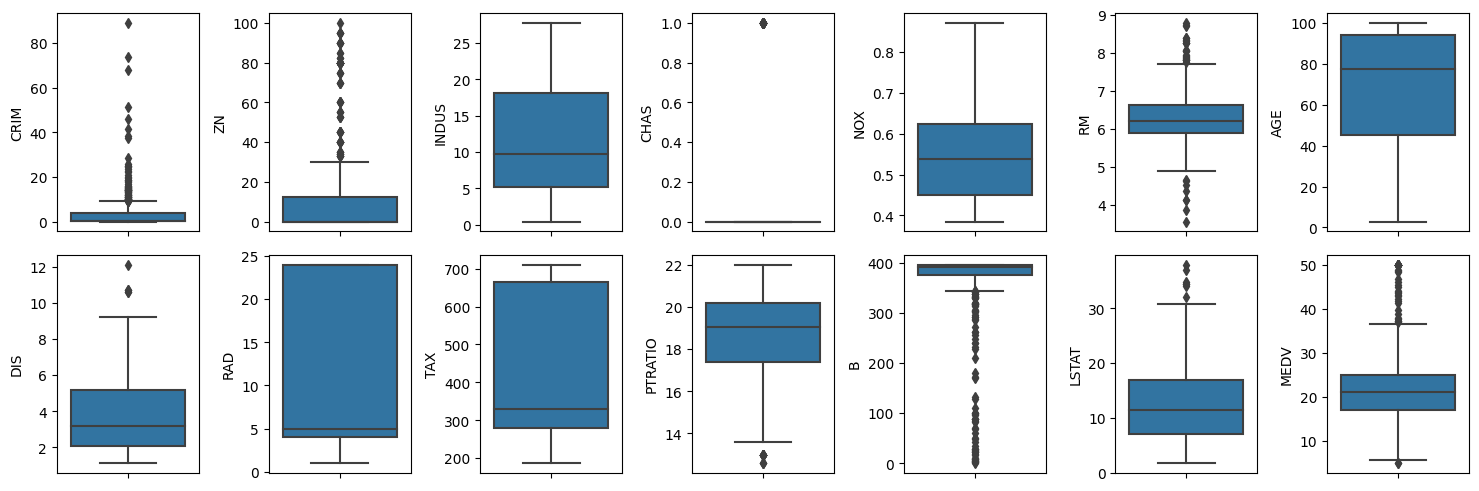

In [6]:
# Boxplot for all the features
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(15,5))  # we have 14 attributes 7*2=14
ax = ax.flatten()  
i = 0
for j in df.columns:
    sns.boxplot(y=j, data=df, ax=ax[i])   # based on the index we are ploting the graphs
    i+=1

plt.tight_layout(pad=1)  
plt.show()

##### We can see that there are outliers in 'crim', 'zn' and 'black'.

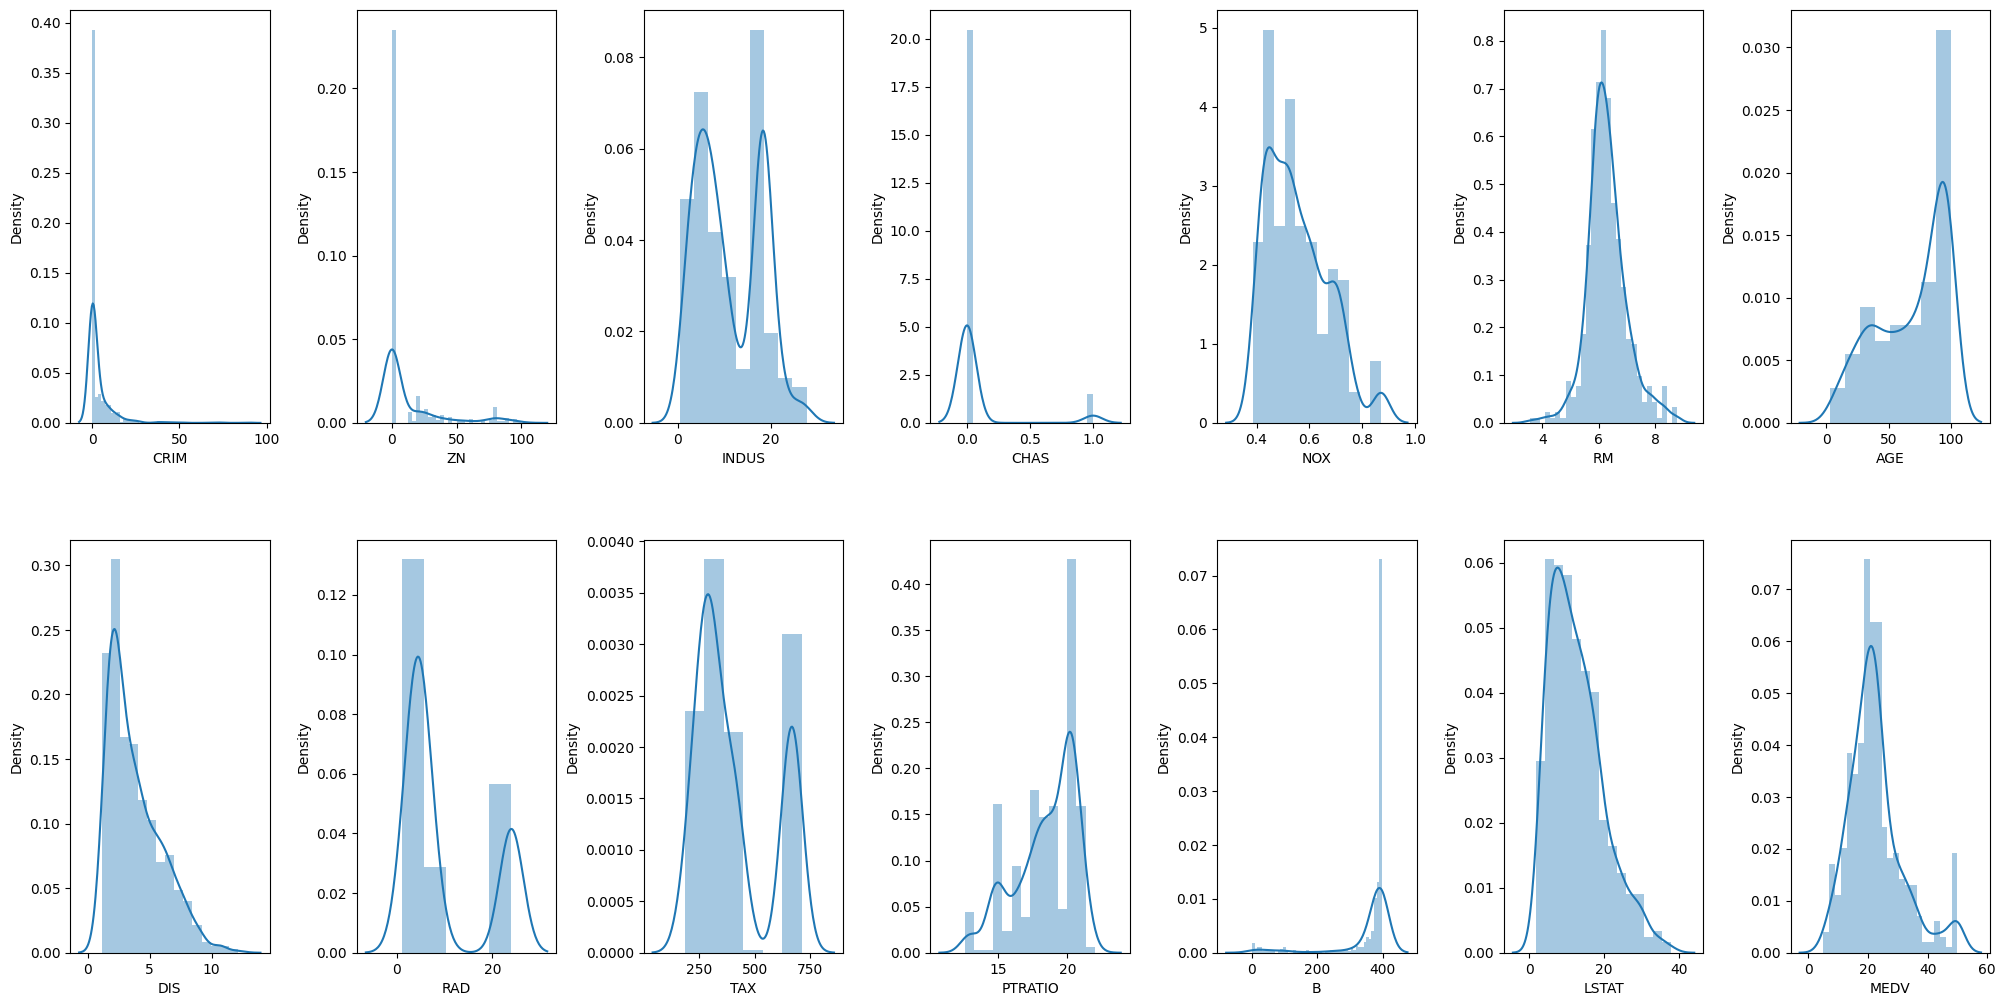

In [7]:
# create dist plot
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.distplot(value, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

##### The output varible 'medv' is having a proper normal distribution range from 0-50 crim is left skewd and 'black' is right skewd; 'chas' is a categorical data 0 higher 1 lower; 'rm' is a complete normal distribution


### Min - Max Normalization
#### if the range is large we use min max normalization to get the range between 0 to 1

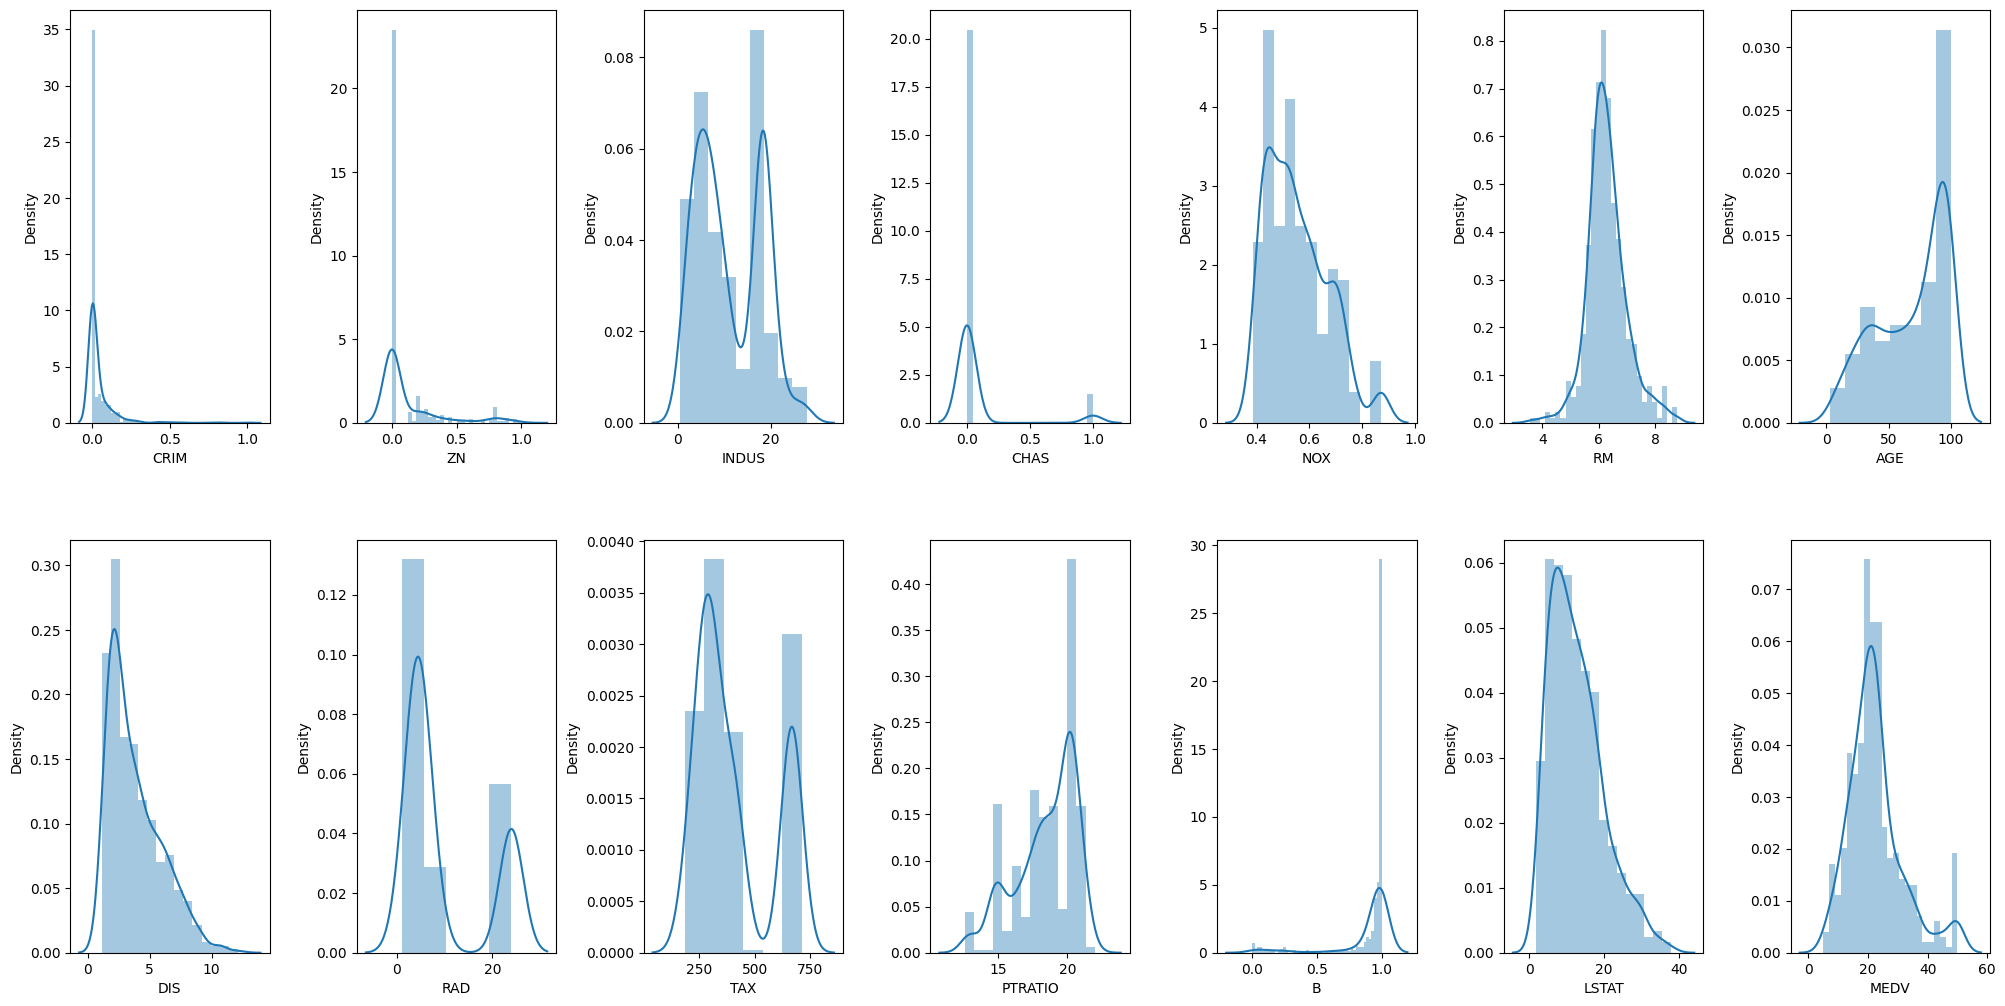

In [8]:
cols = ['CRIM', 'ZN', 'B']
for col in cols:
    # find minimum and maximum of that column
    minimum = min(df[col])
    maximum = max(df[col])
    df[col] = (df[col] - minimum) / (maximum - minimum)    # formula: x-min / max- min

fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.distplot(value, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)


### Studying the data

In [9]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,0.040544,0.113636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,0.898568,12.653063,22.532806
std,0.096679,0.233225,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,0.230205,7.141062,9.197104
min,0.000000,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.000000,1.730000,5.000000
25%,0.000851,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,0.945730,6.950000,17.025000
50%,0.002812,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,0.986232,11.360000,21.200000
75%,0.041258,0.125000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,0.998298,16.955000,25.000000
max,1.000000,1.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,1.000000,37.970000,50.000000


In [10]:
# Storing the data of housing prices in cost variable and scaling it by multiplying it with 1000 to get the exact values
cost = df['MEDV']*1000

In [11]:
# Using numpy to calculate the statistics

mean_cost = np.mean(cost)
std_cost = np.std(cost)
min_cost = np.min(cost)
first_quart = np.percentile(cost, 25)
med_cost = np.median(cost)
third_quart = np.percentile(cost, 75)
max_cost = np.max(cost)

print ("\nFor the Boston Housing:\n\n")
print ("Mean cost: ${:,.2f}\n".format(mean_cost))
print ("Standard deviation of cost: ${:,.2f}\n".format(std_cost))
print ("Minimum cost: ${:,.2f}\n".format(min_cost))
print ("First quartile of cost: ${:,.2f}\n".format(first_quart))
print ("Median cost ${:,.2f}\n".format(med_cost))
print ("Second quartile of cost: ${:,.2f}\n".format(third_quart))
print ("Maximum cost: ${:,.2f}\n".format(max_cost))



For the Boston Housing:


Mean cost: $22,532.81

Standard deviation of cost: $9,188.01

Minimum cost: $5,000.00

First quartile of cost: $17,025.00

Median cost $21,200.00

Second quartile of cost: $25,000.00

Maximum cost: $50,000.00



### Correlation Matrix

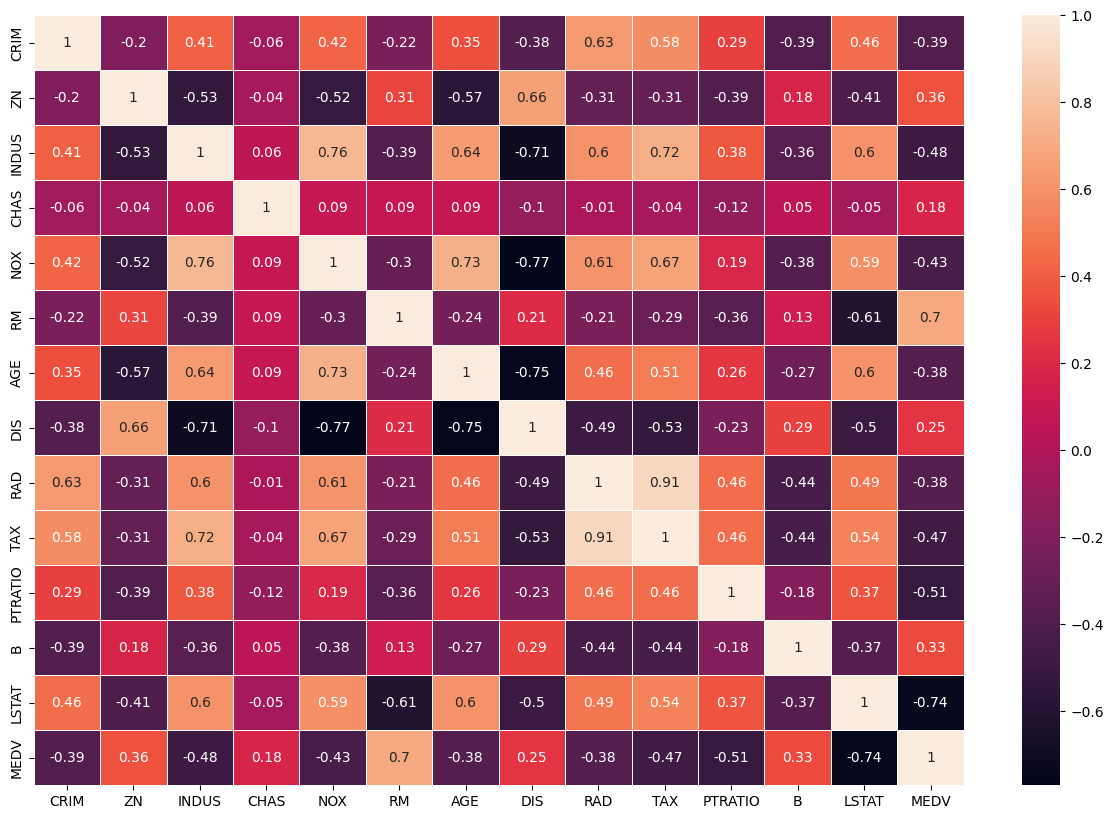

In [12]:
# Using correlation matrix to find highly correlated pairs amongst each other 
# And highly correlated features with the target variable

correlation_matrix = df.corr().round(2)
fig, ax = plt.subplots(figsize=(15,10)) # sizing the heatmap
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax) 
plt.show()


##### From the heatmap, we can see that 'rm' has a strong positive correlation with 'medv' whereas 'lstat' has a high negative correlation with 'medv'.
##### The features 'rad' and 'tax', 'nox' and 'indus', 'dis' and 'age', 'nox' and 'dis' have high correlation.  To avoid multicolliearity problem, these pairs of features shouldn't be used togerther to train a model.


### Plotting features to see how these features vary with 'mdev'

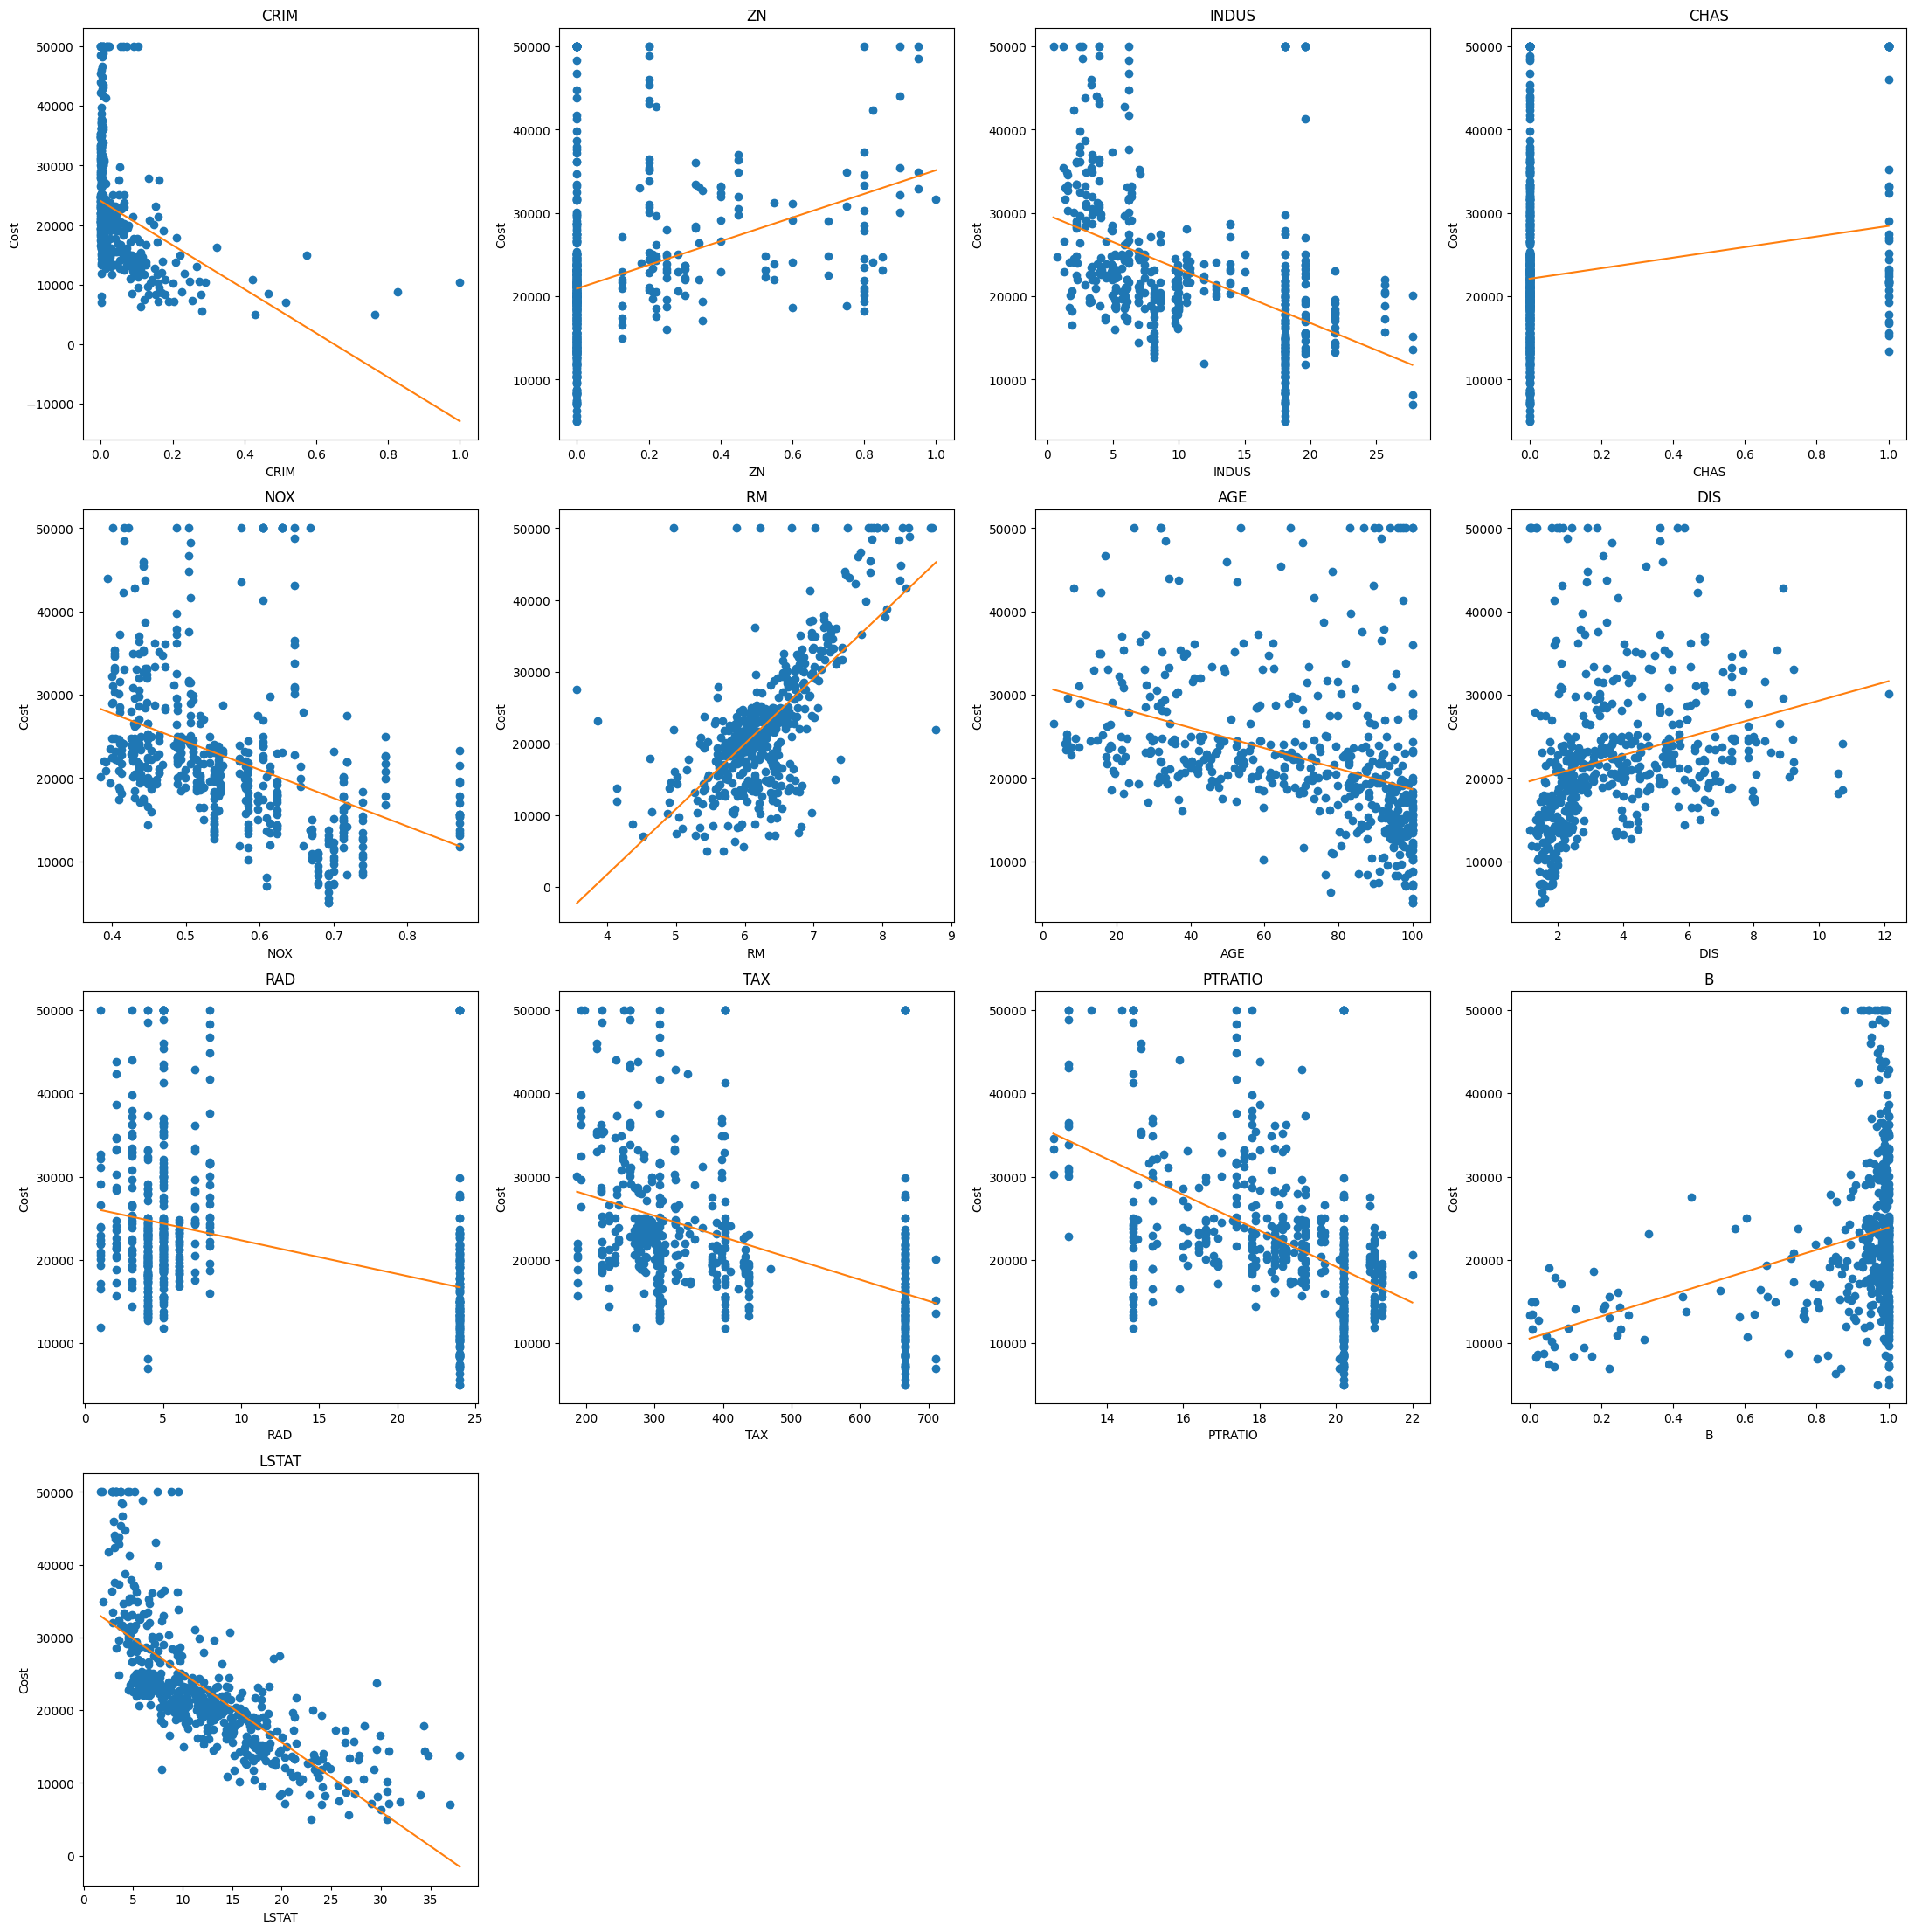

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22, 22)) 
feat=pd.DataFrame(df.iloc[:,0:13]) 
for i, col in enumerate(feat.columns):
    plt.subplot(4,4,i+1) 
    x = df[col]
    y = cost
    plt.plot(x, y, 'o')
   
    # Creating regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.tight_layout(pad=1)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Cost') 

# Feature Selection

In [14]:
prices = df['MEDV']
features = df.drop('MEDV', axis = 1)
X = features
y = prices
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

### Ridge Regression
#### Loss function is OLS loss function + alpha*(sum of squared values of each coefficients)

In [15]:
#Ridge regression
#alpha=1
ridgeR1 = Ridge(alpha = 1) 
ridgeR1.fit(X_train, y_train) 
y_pred1 = ridgeR1.predict(X_test) 

train_score1=ridgeR1.score(X_train,y_train)
test_score1=ridgeR1.score(X_test,y_test)

In [16]:
# get ridge coefficient and print them 

ridge_coefficient1 = pd.DataFrame() 

ridge_coefficient1["Columns"]= X_train.columns 

ridge_coefficient1['Coefficient Estimate'] = pd.Series(ridgeR1.coef_) 
number_of_coeff1 = np.sum(ridgeR1.coef_!=0)
print("alpha=1")
print("Train score: ",train_score1)
print("Test score: ",test_score1)  
print("Number of Coefficents used ",number_of_coeff1)
print(ridge_coefficient1) 

alpha=1
Train score:  0.7256682138607605
Test score:  0.7666232115497829
Number of Coefficents used  13
    Columns  Coefficient Estimate
0      CRIM             -6.742685
1        ZN              5.135486
2     INDUS             -0.021804
3      CHAS              1.998270
4       NOX            -10.707624
5        RM              3.192349
6       AGE             -0.002856
7       DIS             -1.307578
8       RAD              0.263019
9       TAX             -0.011498
10  PTRATIO             -0.905164
11        B              2.990183
12    LSTAT             -0.564201


In [17]:
#alpha=0.01
ridgeR2 = Ridge(alpha = 0.01) 
ridgeR2.fit(X_train, y_train) 
y_pred2 = ridgeR2.predict(X_test) 

train_score2=ridgeR2.score(X_train,y_train)
test_score2=ridgeR2.score(X_test,y_test)
# get ridge coefficient and print them 

ridge_coefficient2 = pd.DataFrame() 

ridge_coefficient2["Columns"]= X_train.columns 

ridge_coefficient2['Coefficient Estimate'] = pd.Series(ridgeR2.coef_) 
number_of_coeff2 = np.sum(ridgeR2.coef_!=0)

print("\nalpha=0.01")
print("Train score: ",train_score2)
print("Test score: ",test_score2)  
print("Number of Coefficents used ",number_of_coeff2)
print(ridge_coefficient2)



alpha=0.01
Train score:  0.7293573872397499
Test score:  0.7635267073547058
Number of Coefficents used  13
    Columns  Coefficient Estimate
0      CRIM             -9.949579
1        ZN              5.798091
2     INDUS              0.017649
3      CHAS              2.127837
4       NOX            -19.420639
5        RM              3.097297
6       AGE              0.004320
7       DIS             -1.497328
8       RAD              0.304679
9       TAX             -0.011132
10  PTRATIO             -0.987369
11        B              2.906322
12    LSTAT             -0.544949


### Lasso Regression
#### Loss function is OLS (Ordinary Least Squares) loss function + alpha*(sum of absolute values of each coefficients)


In [18]:
#Lasso Regression
# Train the model 
#alpha = 1
lasso1 = Lasso(alpha = 1) 
lasso1.fit(X_train, y_train) 
y_pred1 = lasso1.predict(X_test) 

train_score1=lasso1.score(X_train,y_train)
test_score1=lasso1.score(X_test,y_test)

lasso_coeff1 = pd.DataFrame() 
lasso_coeff1["Columns"] = X_train.columns 
lasso_coeff1['Coefficient Estimate'] = pd.Series(lasso1.coef_) 
number_of_coeff1 = np.sum(lasso1.coef_!=0)
print("alpha=1")
print("Train score: ",train_score1)
print("Test score: ",test_score1)  
print("Number of Coefficents used ",number_of_coeff1)
print(lasso_coeff1) 

alpha=1
Train score:  0.6453513752307583
Test score:  0.6232888953434681
Number of Coefficents used  8
    Columns  Coefficient Estimate
0      CRIM             -0.000000
1        ZN              0.000000
2     INDUS             -0.036228
3      CHAS              0.000000
4       NOX             -0.000000
5        RM              0.334431
6       AGE              0.022103
7       DIS             -0.183863
8       RAD              0.159851
9       TAX             -0.009721
10  PTRATIO             -0.917968
11        B              0.000000
12    LSTAT             -0.815171


In [19]:
#alpha=0.01
lasso2 = Lasso(alpha = 0.01) 
lasso2.fit(X_train, y_train) 
y_pred1 = lasso2.predict(X_test) 

train_score2=lasso2.score(X_train,y_train)
test_score2=lasso2.score(X_test,y_test)

lasso_coeff2 = pd.DataFrame() 
lasso_coeff2["Columns"] = X_train.columns 
lasso_coeff2['Coefficient Estimate'] = pd.Series(lasso2.coef_) 
number_of_coeff2 = np.sum(lasso2.coef_!=0)

print("\nalpha=0.01")
print("Train score: ",train_score2)
print("Test score: ",test_score2)  
print("Number of Coefficents used ",number_of_coeff2)
print(lasso_coeff2)


alpha=0.01
Train score:  0.7285878151383076
Test score:  0.7645296764626491
Number of Coefficents used  13
    Columns  Coefficient Estimate
0      CRIM             -8.161982
1        ZN              5.280687
2     INDUS              0.001359
3      CHAS              1.988280
4       NOX            -16.117375
5        RM              3.120598
6       AGE              0.001933
7       DIS             -1.402133
8       RAD              0.282632
9       TAX             -0.011112
10  PTRATIO             -0.962414
11        B              2.776172
12    LSTAT             -0.556407


In [20]:
# For plots
from sklearn.linear_model import LinearRegression
from sklearn import metrics

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

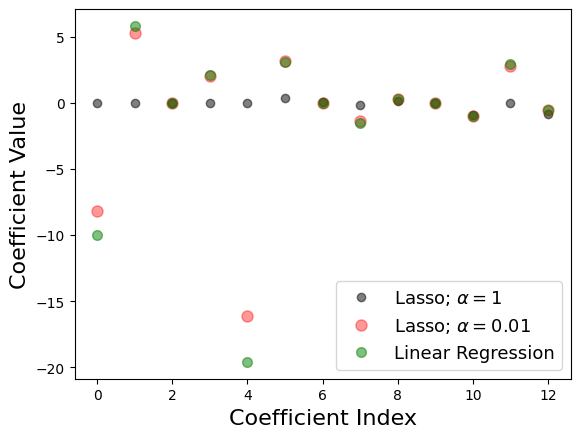

In [21]:
# To plot lasso Regression

plt.plot(lasso1.coef_,alpha=0.5,linestyle='none',marker='o',markersize=6,color='black',label=r'Lasso; $\alpha = 1$')
plt.plot(lasso2.coef_,alpha=0.4,linestyle='none',marker='o',markersize=8,color='red',label=r'Lasso; $\alpha = 0.01$') 
plt.plot(model.coef_,alpha=0.5,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')

plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Value',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()

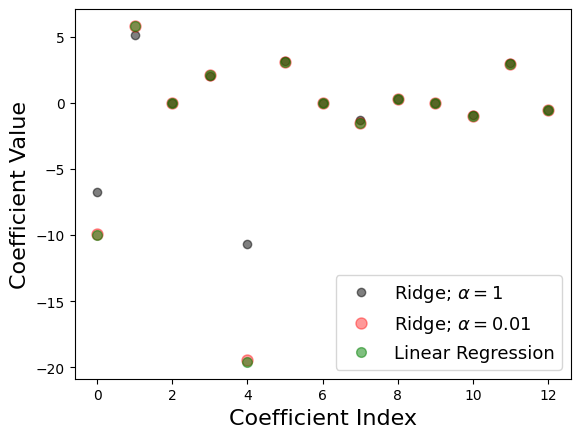

In [22]:
# To plot Ridge Regression
plt.plot(ridgeR1.coef_,alpha=0.5,linestyle='none',marker='o',markersize=6,color='black',label=r'Ridge; $\alpha = 1$')
plt.plot(ridgeR2.coef_,alpha=0.4,linestyle='none',marker='o',markersize=8,color='red',label=r'Ridge; $\alpha = 0.01$') 
plt.plot(model.coef_,alpha=0.5,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')

plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Value',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()

# Building Models

For Linear model:

Training Score:  0.7293585058196337

Testing Score:  0.7634174432138466




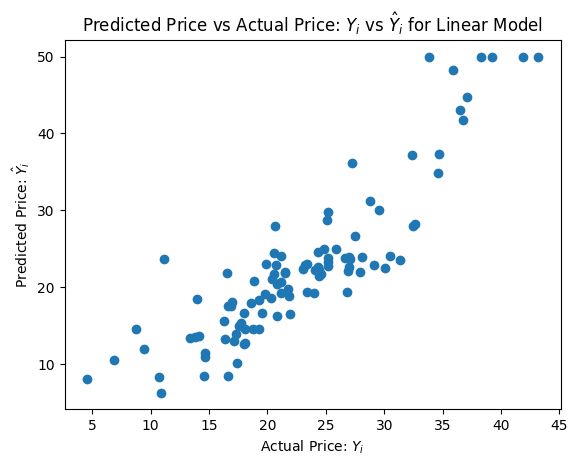

For Support Vector(Linear kernel) model:

Training Score:  0.6882550665507238

Testing Score:  0.7583353667285321




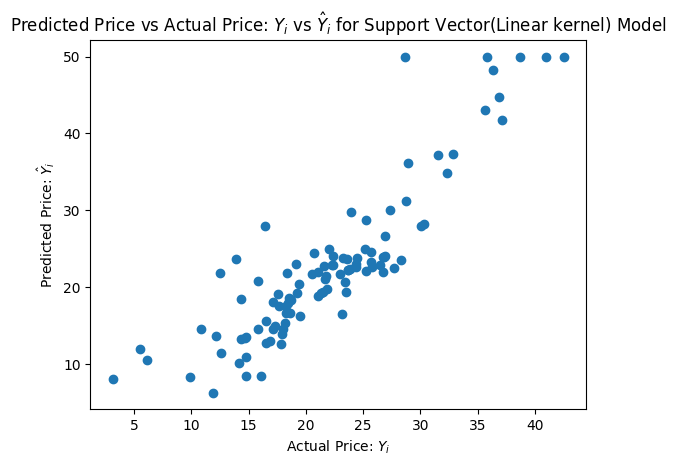

For Support Vector(Sigmoid kernel) model:

Training Score:  -1.4884360939563543

Testing Score:  -1.4144315691375757




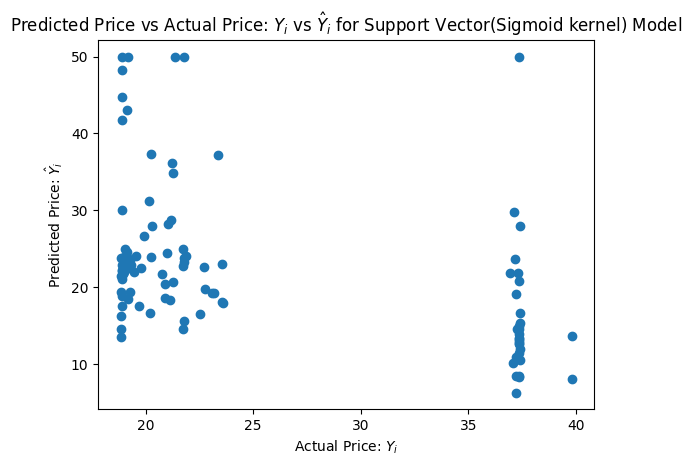

For Support Vector(Poly kernel) model:

Training Score:  0.19684633339907465

Testing Score:  0.15755884449115687




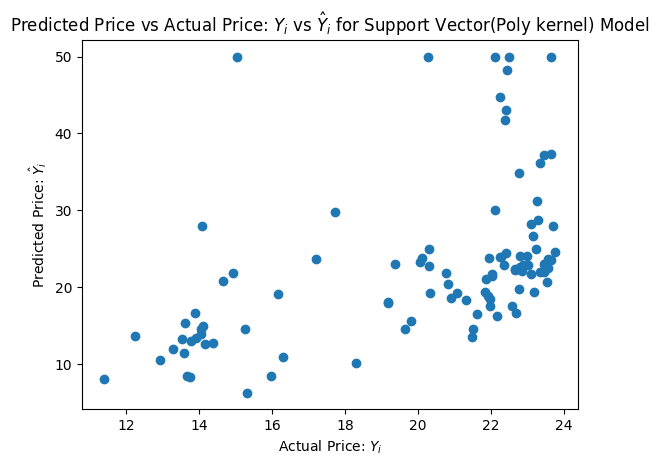

For Support Vector(RBF kernel) model:

Training Score:  0.19373384108841696

Testing Score:  0.15624603706389206




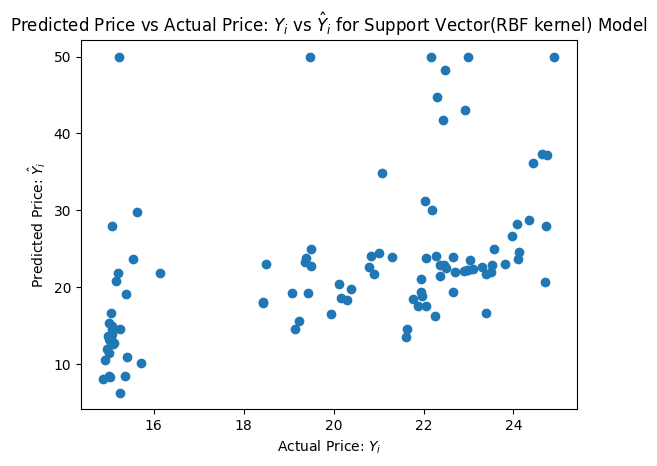

For K Neighbors model:

Training Score:  0.7061519127081357

Testing Score:  0.6672554176610904




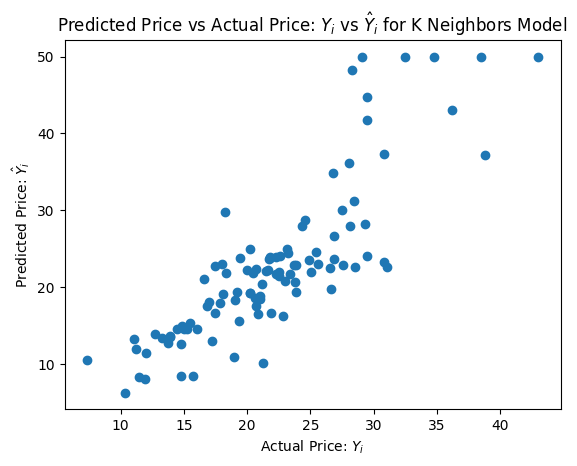

For Random Forest model:

Training Score:  0.9812411056767751

Testing Score:  0.9035076024321957




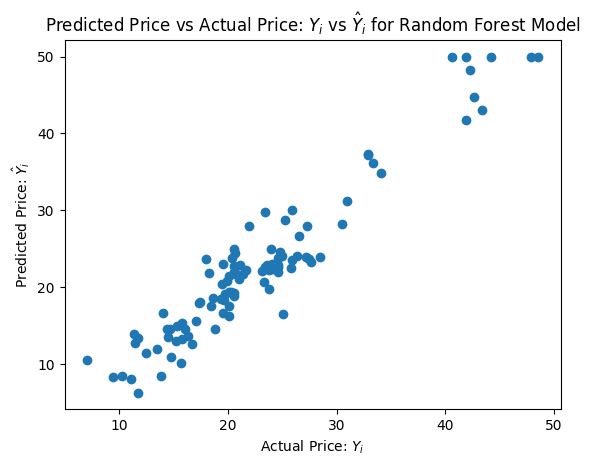

For XG Boost model:

Training Score:  0.9999952977725205

Testing Score:  0.9085452920081707




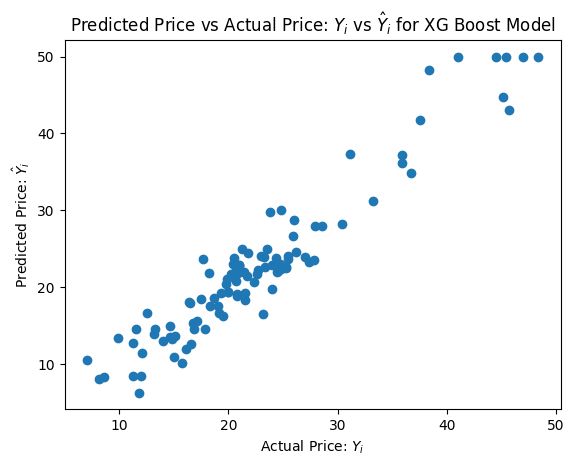

In [23]:
X = features
Y = df.iloc[:,-1]

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as MSE

#spliting data into traning set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from xgboost import XGBRegressor  
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from matplotlib.pyplot import figure

modelNames = ['Linear', 'Support Vector(Linear kernel)', 'Support Vector(Sigmoid kernel)', 'Support Vector(Poly kernel)', 'Support Vector(RBF kernel)', 'K Neighbors', 'Random Forest', 'XG Boost']
modelRegressors = [LinearRegression(), SVR(kernel= 'linear'), SVR(kernel= 'sigmoid'), SVR(kernel= 'poly'), SVR(kernel= 'rbf'), KNeighborsRegressor(), RandomForestRegressor(), XGBRegressor(verbosity = 0)]
models = pd.DataFrame({'modelNames' : modelNames, 'modelRegressors' : modelRegressors})
counter=0

for i in models['modelRegressors']:
    i.fit(X_train, y_train)
    y_pred = i.predict(X_test)
    print('For %s model:'%(models.iloc[counter,0],))
    print('\nTraining Score: ', i.score(X_train,y_train))
    print('\nTesting Score: ', i.score(X_test,y_test))
    print('\n')
    plt.scatter(y_pred,y_test)
    plt.xlabel("Actual Price: $Y_i$")
    plt.ylabel("Predicted Price: $\hat{Y}_i$")
    plt.title('Predicted Price vs Actual Price: $Y_i$ vs $\hat{Y}_i$ for %s Model'%(models.iloc[counter,0],))
    plt.show()
    counter+=1

### 10 fold Cross Validation

In [24]:
from sklearn.model_selection import cross_val_score as CVS
import time

print('\n\nUsing R squared method: ----------------------------------------------------------------------\n')
modelNames = ['Linear', 'Support Vector', 'K Neighbors', 'Random Forrest', 'XG Boost']
modelRegressors = [LinearRegression(), SVR(kernel= 'linear'), KNeighborsRegressor(), RandomForestRegressor(), XGBRegressor(verbosity = 0)]
models = pd.DataFrame({'modelNames' : modelNames, 'modelRegressors' : modelRegressors})
counter=0
score=[]
execution_time=[]
adjustedr2 = []

for i in models['modelRegressors']:
    start = time.time()
    
    accuracy = CVS(i, X_train, y_train, scoring='r2', cv=10)
    print('\n\nFor %s Regression model' %(models.iloc[counter,0],))
    print('R2 value is %.2f' %(accuracy.mean()))
    R2 = accuracy.mean()
    score.append(R2)

    n= len(X_train)
    p = len(X.columns)
    adj_R2 = 1- ((1-R2) * (n-1)/(n-p-1))
    print('Adjusted R2 value is %.2f' %(adj_R2))
    adjustedr2.append(adj_R2)
    
    print('Execution time is %.2f ms' %((time.time() - start)*10))
    execution_time.append((time.time() - start)*10)
    counter+=1



Using R squared method: ----------------------------------------------------------------------



For Linear Regression model
R2 value is 0.68
Adjusted R2 value is 0.67
Execution time is 0.60 ms


For Support Vector Regression model
R2 value is 0.65
Adjusted R2 value is 0.64
Execution time is 98.30 ms


For K Neighbors Regression model
R2 value is 0.50
Adjusted R2 value is 0.48
Execution time is 0.47 ms


For Random Forrest Regression model
R2 value is 0.86
Adjusted R2 value is 0.86
Execution time is 88.72 ms


For XG Boost Regression model
R2 value is 0.88
Adjusted R2 value is 0.88
Execution time is 7.45 ms


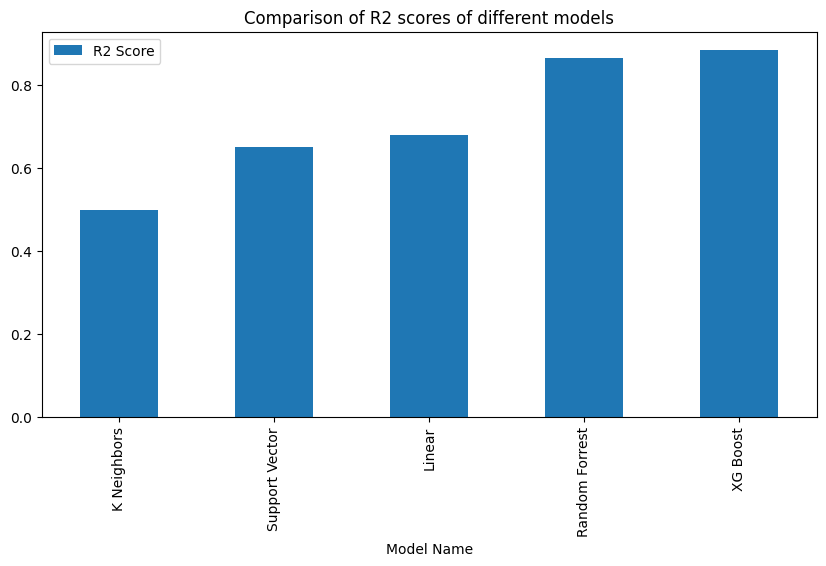

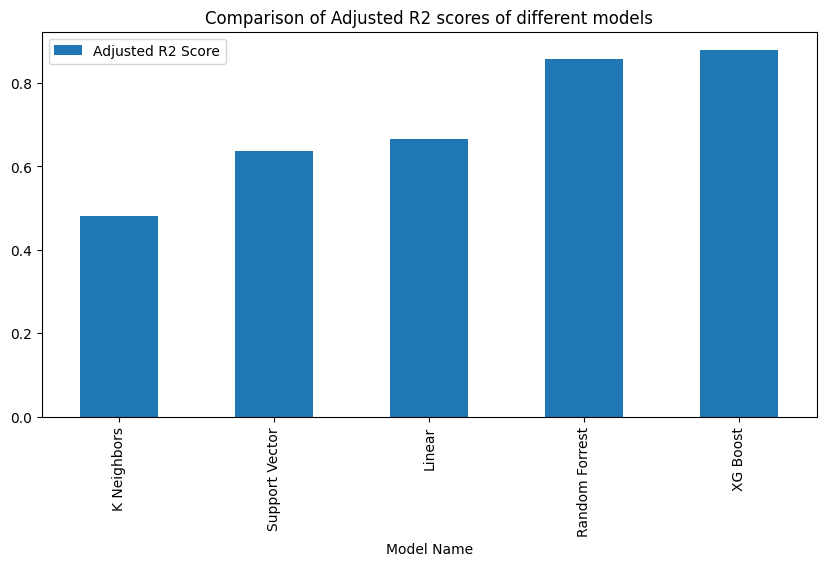

In [25]:
pd.DataFrame({'Model Name' : modelNames,'R2 Score' : score}).sort_values(by='R2 Score', ascending=True).plot(x=0, y=1, kind='bar', figsize=(10,5), title='Comparison of R2 scores of different models', )
plt.show()

pd.DataFrame({'Model Name' : modelNames,'Adjusted R2 Score' : adjustedr2}).sort_values(by='Adjusted R2 Score', ascending=True).plot(x=0, y=1, kind='bar', figsize=(10,5), title='Comparison of Adjusted R2 scores of different models', )
plt.show()

##### Generally, a higher R-squared indicates a better fit for the model. Therefore, XG Boost creates a better fitting model.
##### There is almost always a increase in the value of R2 score with addition of new features. On the other hand, there is no substantial increase in value of Adj R2 with addition of too many features

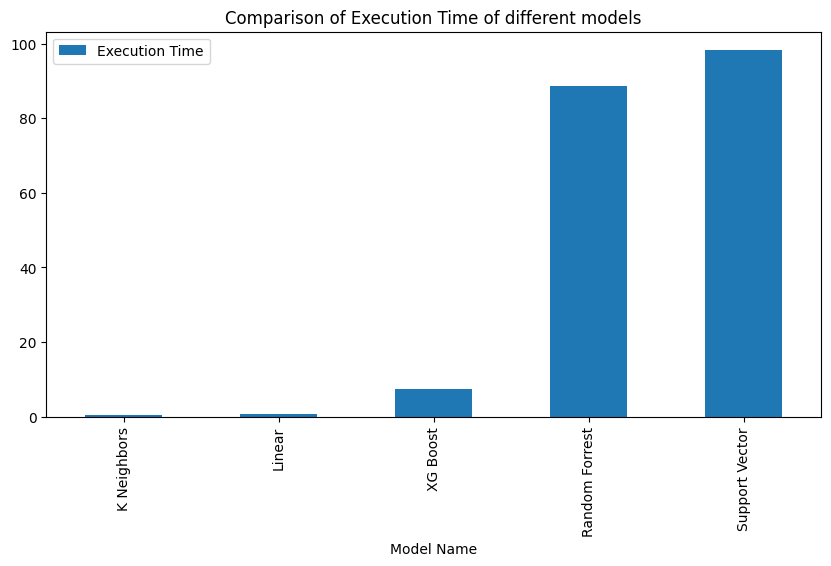

In [26]:
pd.DataFrame({'Model Name' : modelNames,'Execution Time' : execution_time }).sort_values(by='Execution Time', ascending=True).plot(x=0, y=1, kind='bar', figsize=(10,5), title='Comparison of Execution Time of different models', )
plt.show()


### Learning Curves
#### Each graph visualizes the learning curves of the model for both training and testing scores as the size of the training set is increased.

In [27]:
from sklearn.model_selection import learning_curve
# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(LinearRegression(), X_train, y_train, cv=10, scoring='r2', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))

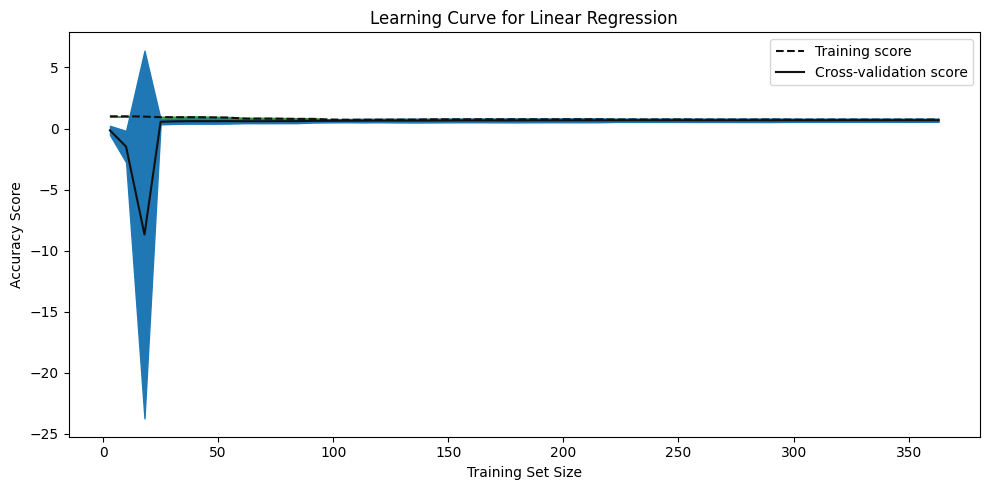

In [28]:
# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
 
# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
 
plt.figure(figsize=(10, 5)) 
 
# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")
 
# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#2ca02c")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#1f77b4")
 
 
# Create plot
plt.title("Learning Curve for Linear Regression")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

### Low Bias, Low Variance - Good Fit

### Training accuracy stays high despite the training set size which shows low bias. Cross-validation score (blue line) stays constant after an initial dip but has a almost no gap with the training score showing low variance. The model is a good fit because of low bias and low variance.


In [29]:
from sklearn.model_selection import learning_curve
# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(SVR(kernel='linear'), X_train, y_train, cv=10, scoring='r2', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))


# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

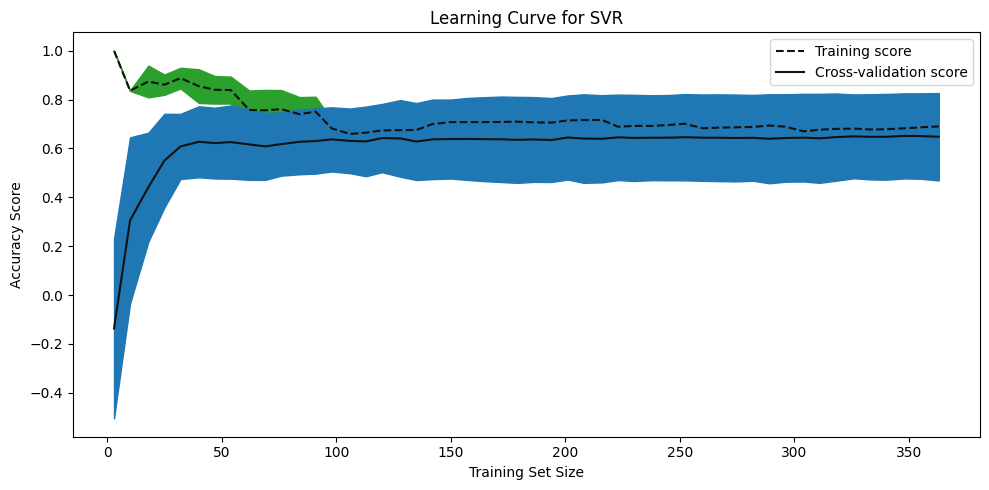

In [30]:
plt.figure(figsize=(10, 5)) 

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#2ca02c")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#1f77b4")


# Create plot
plt.title("Learning Curve for SVR")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

**High Bias, Low Variance - Underfitting (slight amount)**

Training accuracy gets low with addition of training examples which shows high bias. Cross-validation score (blue line) stays almost constant but has a large gap in the beginning showing lower gap in parts showing low variance. To improve the model, more data addition will not be helpful as the CV score has become almost constant and there is convergence. More features can be added or regularization can be reduced to get a better model.


In [31]:
from sklearn.model_selection import learning_curve
# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(KNeighborsRegressor(n_neighbors=3), X_train, y_train, cv=10, scoring='r2', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))
# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

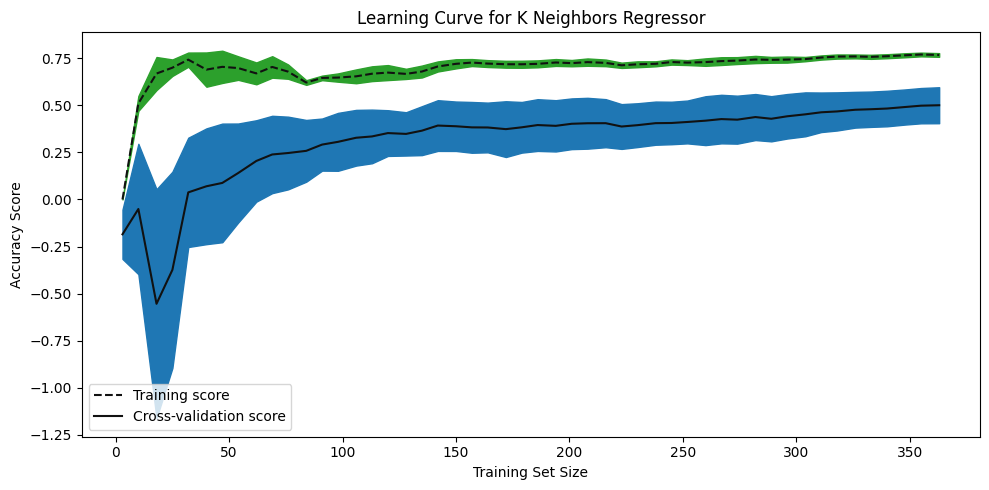

In [32]:
plt.figure(figsize=(10, 5)) 

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#2ca02c")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#1f77b4")


# Create plot
plt.title("Learning Curve for K Neighbors Regressor")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

**Low Bias, High Variance - Overfitting**

Training accuracy is high after certain number of training examples which shows low bias. Cross-validation score (blue line) increases over time after a significant dip however the large gap in the shows high variance. To improve the model, more data ca be addition will not be helpful as the CV line has become almost linear. More features can be removed to get a lower variance.


In [33]:
from sklearn.model_selection import learning_curve
# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(RandomForestRegressor(),X_train, y_train, cv=10, scoring='r2', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

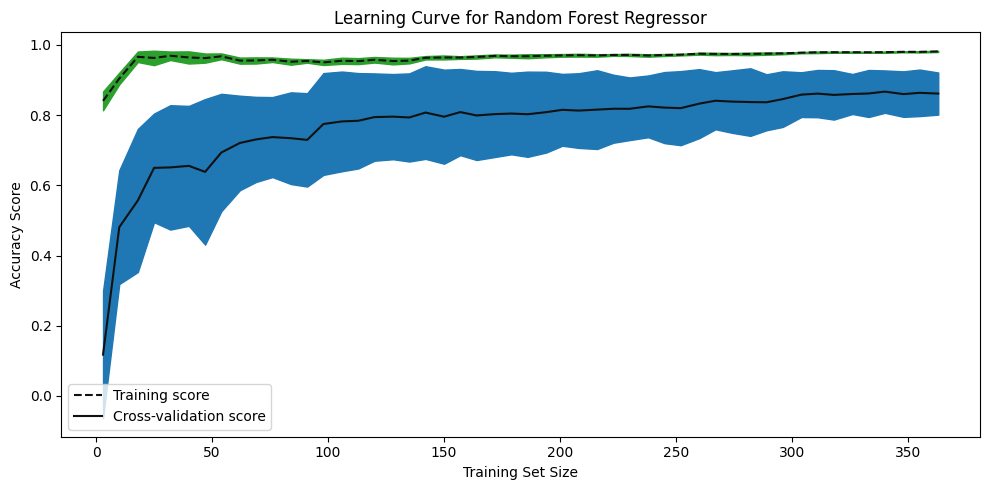

In [34]:
plt.figure(figsize=(10, 5)) 

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#2ca02c")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#1f77b4")


# Create plot
plt.title("Learning Curve for Random Forest Regressor")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

**Low Bias, High Variance - Overfitting**

Training accuracy is high regardless of training examples which shows low bias. Cross-validation score (blue line) increases over time but has a large gap in the beginning showing high variance. To improve the model, more data addition will not be helpful as the CV line has become almost linear. More features can be removed to get a lower variance.


In [35]:
from sklearn.model_selection import learning_curve
# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(XGBRegressor(),X_train, y_train, cv=10, scoring='r2', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)


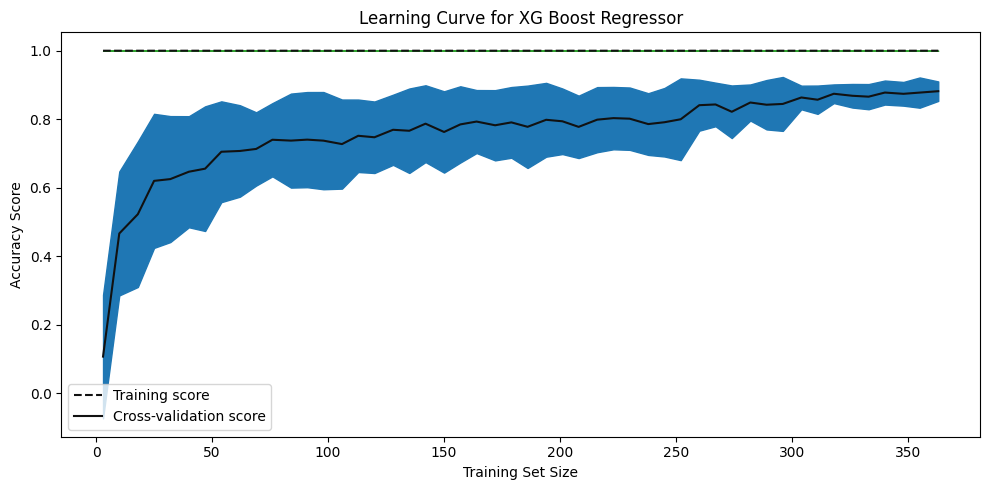

In [36]:
plt.figure(figsize=(10, 5)) 

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#2ca02c")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#1f77b4")


# Create plot
plt.title("Learning Curve for XG Boost Regressor")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

**Low Bias, High Variance - Overfitting**

Training accuracy is at its maximum regardless of training examples which shows low bias. Cross-validation score (blue line) increases over time but has a huge gap in the beginning showing high variance. To improve the model, more data can be added or more features can be removed which will lead to a lower variance.


## Optimizing hyperparameters for XG Boost Regressor

In [37]:
#spliting data into traning set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

# Split your data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the XGBoost model instance
xgb = XGBRegressor(verbosity=0)

# Define the parameter grid for random search
n_estimators = [int(x) for x in np.linspace(start=200, stop=500, num=10)]
max_depth = [1, 2, 3, 4]
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]

# Create random grid
random_grid = {
    'n_estimators': n_estimators,
    'learning_rate': learning_rate,
    'max_depth': max_depth
}

# Random search of parameters
xgb_random = RandomizedSearchCV(estimator=xgb, param_distributions=random_grid, n_iter=100, cv=10, n_jobs=-1, return_train_score=True)

# Fit the model
xgb_random.fit(X_train, y_train)

# Evaluate on the test set
y_pred = xgb_random.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print("Best params are", xgb_random.best_params_)
print("Best Train Score is", max(xgb_random.cv_results_['mean_train_score']))
print("Best cross-validation score is", xgb_random.best_score_)
print("Mean Squared Error on test set is", mse)

Best params are {'n_estimators': 333, 'max_depth': 3, 'learning_rate': 0.1}
Best Train Score is 0.9999999755599014
Best cross-validation score is 0.848003154012938
Mean Squared Error on test set is 6.795884785144281


      Actual     Predicted
173  23600.0  23529.255859
274  32400.0  32005.718750
491  13600.0  17393.099609
72   22800.0  23200.216797
452  16100.0  18409.220703
76   20000.0  22520.599609
316  17800.0  17827.916016
140  14000.0  14998.098633
471  19600.0  20934.125000
500  16800.0  21057.117188


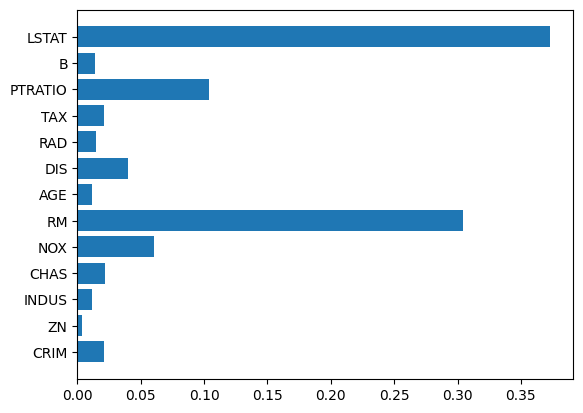

In [39]:
from xgboost import plot_importance
plt.barh(X_train.columns,xgb_random.best_estimator_.feature_importances_)

y_pred = xgb_random.predict(X_test)

Y_compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

print(Y_compare.head(10)*1000)


## Removing least important features (determined by feature selection method)

In [40]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

features = df.drop(['MEDV','TAX','AGE','INDUS'], axis = 1)
X = features
#spliting data into traning set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Create an XGBRegressor instance
xgb = XGBRegressor(verbosity=0)

# Define the hyperparameter search space
param_distributions = {
    'n_estimators': [int(x) for x in np.linspace(start=200, stop=500, num=10)],
    'max_depth': [1, 2, 3, 4],
    'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
}

# Create a RandomizedSearchCV instance
xgb_random = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_distributions,
    n_iter=100,
    cv=10,
    n_jobs=-1,
    return_train_score=True
)

# Fit the RandomizedSearchCV on your data
xgb_random.fit(X_train, y_train)

# Print the best hyperparameters and scores
print("Best params are", xgb_random.best_params_)
print("Best Train Score is", max(xgb_random.cv_results_['mean_train_score']))
print("Best cross validation score is", xgb_random.best_score_)
print("Best test score is", xgb_random.score(X_test, y_test))

Best params are {'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.2}
Best Train Score is 0.9999999667516255
Best cross validation score is 0.8769372557314844
Best test score is 0.9129163836379012


## Removing least important features (determined by XG Boost importance method)

In [41]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

features = df.drop(['MEDV','B','RAD','AGE','INDUS','ZN'], axis = 1)
X = features
#spliting data into traning set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#optimizing hyprparameters
# Create an XGBRegressor instance
xgb = XGBRegressor(verbosity=0)

# Define the hyperparameter search space
param_distributions = {
    'n_estimators': [int(x) for x in np.linspace(start=200, stop=500, num=10)],
    'max_depth': [1, 2, 3, 4],
    'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
}

# Create a RandomizedSearchCV instance
xgb_random = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_distributions,
    n_iter=100,
    cv=10,
    n_jobs=-1,
    return_train_score=True
)

# Fit the RandomizedSearchCV on your data
xgb_random.fit(X_train, y_train)

# Print the best hyperparameters and scores
print("Best params are", xgb_random.best_params_)
print("Best Train Score is", max(xgb_random.cv_results_['mean_train_score']))
print("Best cross validation score is", xgb_random.best_score_)
print("Best test score is", xgb_random.score(X_test, y_test))

Best params are {'n_estimators': 200, 'max_depth': 4, 'learning_rate': 0.1}
Best Train Score is 0.9999999556019062
Best cross validation score is 0.8739459372093638
Best test score is 0.9214937427349178
